In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from google.colab import files
%matplotlib inline

In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=338c0e7bd08d42294c15ec176d56c8253d6009451d6710

In [3]:
uploaded = files.upload()
sendust = pd.read_csv('Database_raw.csv')
sendust.describe()

Si          Al  Initial permeability  Maximum permeability  \
count  148.000000  148.000000            148.000000            148.000000   
mean     6.552568    5.152500           2627.248649          17099.775676   
std      4.197243    3.819577           5162.332488          24353.043121   
min      0.000000    0.000000              1.800000              1.800000   
25%      3.007500    2.137500            550.000000           4250.000000   
50%      6.700000    4.770000            990.000000           9670.000000   
75%      9.822500    7.407500           1800.000000          15802.500000   
max     14.840000   13.690000          35100.000000         162000.000000   

            Losses  Remanent induction  Coercivity  Magnetic polarization  \
count   122.000000          122.000000  122.000000              66.000000   
mean    989.065574         5490.163934    0.351279           13501.378788   
std    1026.161247         2633.380753    0.346178            5343.299435   
min      16.000000          130.000000    0.015000             176.000000   
25%     319.500000         3300.000000    0.142500           10725.000000   
50%     814.500000         5370.000000    0.275000           14135.000000   
75%    1456.750000         8000.000000    0.487500           17885.000000   
max    8640.000000         9800.000000    2.900000           21520.000000   

       Resistivity  
count   105.000000  
mean     87.801905  
std      31.036982  
min      10.500000  
25%      71.600000  
50%      89.800000  
75%      98.500000  
max     182.500000

In [ ]:
profile = pandas_profiling.profile_report.ProfileReport(sendust.copy(), title='Profiling Report of sendust dataset', html={'style':{'full_width':True}})
profile.to_file("modified_ds statistic.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data transformations

In [4]:
sendust['Si'], sendust['Al'] = round(sendust['Si'], 1), round(sendust['Al'], 1)

In [5]:
Fe = 100 - (sendust['Al'] + sendust["Si"])

In [6]:
#Creation of column with Fe comntent
sendust.insert(2, "Fe", Fe)

In [7]:
#transform coertivity from Oe to A/m 
sendust['Coercivity'] = sendust['Coercivity']*79.5774715459


In [8]:
#round new values of the coercivity
sendust['Coercivity'] = round(sendust['Coercivity'], 2)

In [9]:
#replacing an or remove erroneous value
sendust = sendust.replace({'Magnetic polarization':{1085:10850}})
sendust.drop(labels = [147],axis = 0, inplace = True)

In [10]:
#Фззднштп logarithm function 
sendust['Maximum permeability']=np.log(sendust['Maximum permeability'])
sendust['Initial permeability']=np.log(sendust['Initial permeability'])
sendust.rename(columns = {'Initial permeability':'Log(initial permeability)', 'Maximum permeability':'Log(max permeability)'}, inplace = True )

In [ ]:
#save preprocessed dataset
sendust.to_csv('Database_preprocessed.csv')
files.download('Database_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Setting the Graph Drawing Style

In [11]:
design={'axes.linewidth': 1.875,
 'lines.linewidth': 2,
 'lines.markersize': 9.0,
 'xtick.major.width': 1.5,
 'ytick.major.width': 1.5,
 'xtick.major.size': 9.0,
 'ytick.major.size': 9.0,
 'font.size': 14.0,
 'axes.labelsize': 14.0,
 'axes.titlesize': 14.0,
 'xtick.labelsize': 14.0,
 'ytick.labelsize': 14.0,
 'legend.fontsize': 14.0}

In [12]:
rcParams['figure.figsize'] = 5,3.8
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_context(context=design)

# Statistic of independed parameters

Text(0.5, 0, 'Content, %')

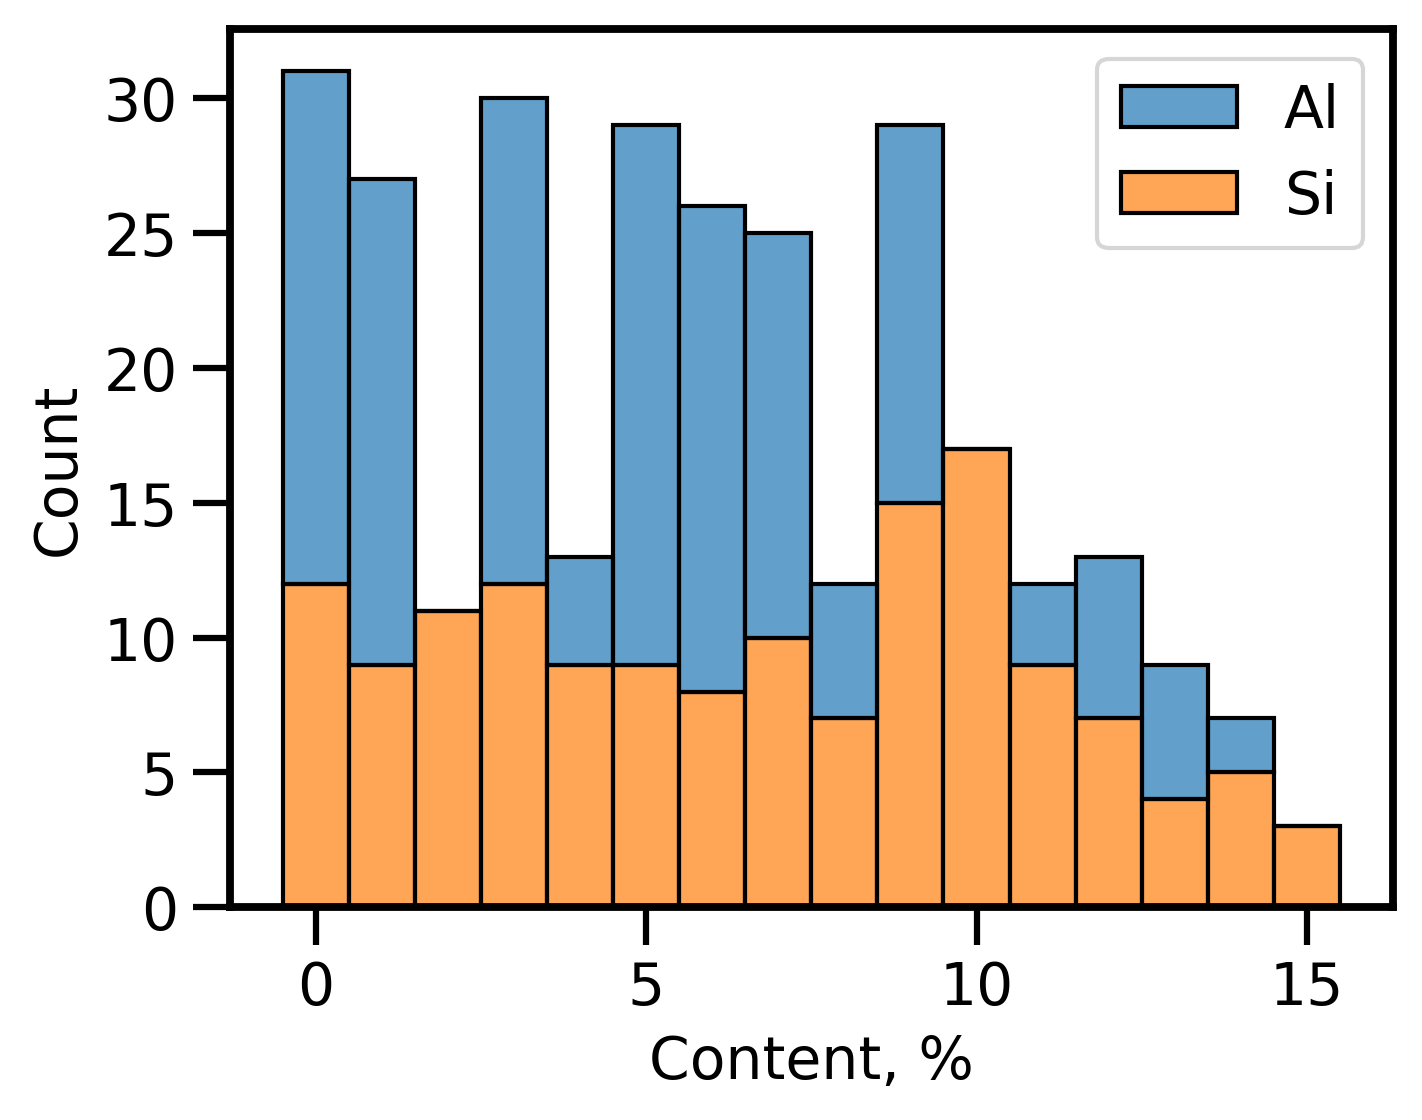

In [14]:
stat_elements=sns.histplot(sendust[['Al','Si']], discrete=True, alpha=0.7, multiple="stack")
stat_elements.set_xlabel("Content, %")

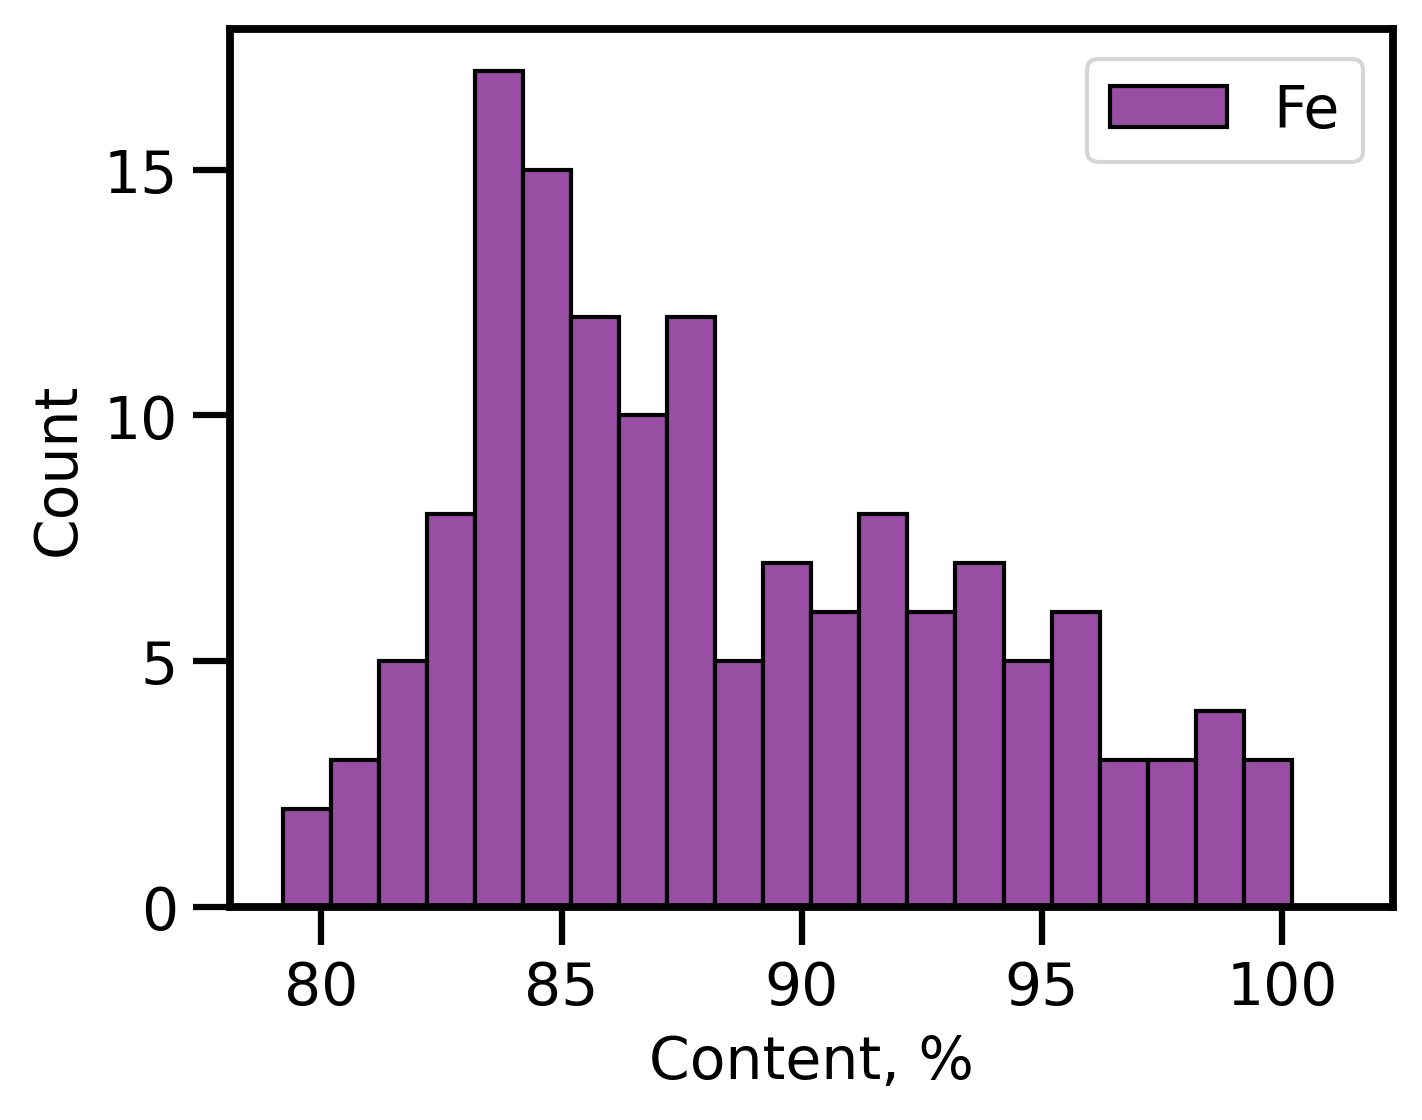

In [15]:
total_elements = sns.histplot(sendust['Fe'],discrete=True, color='#984ea3', alpha=1)
total_elements.set_xlabel("Content, %")
total_elements.legend(['Fe'])

# Analysis of features and targets

In [16]:
features = list(sendust.iloc[:,0:3])
targets = list(sendust.iloc[:,3:10])

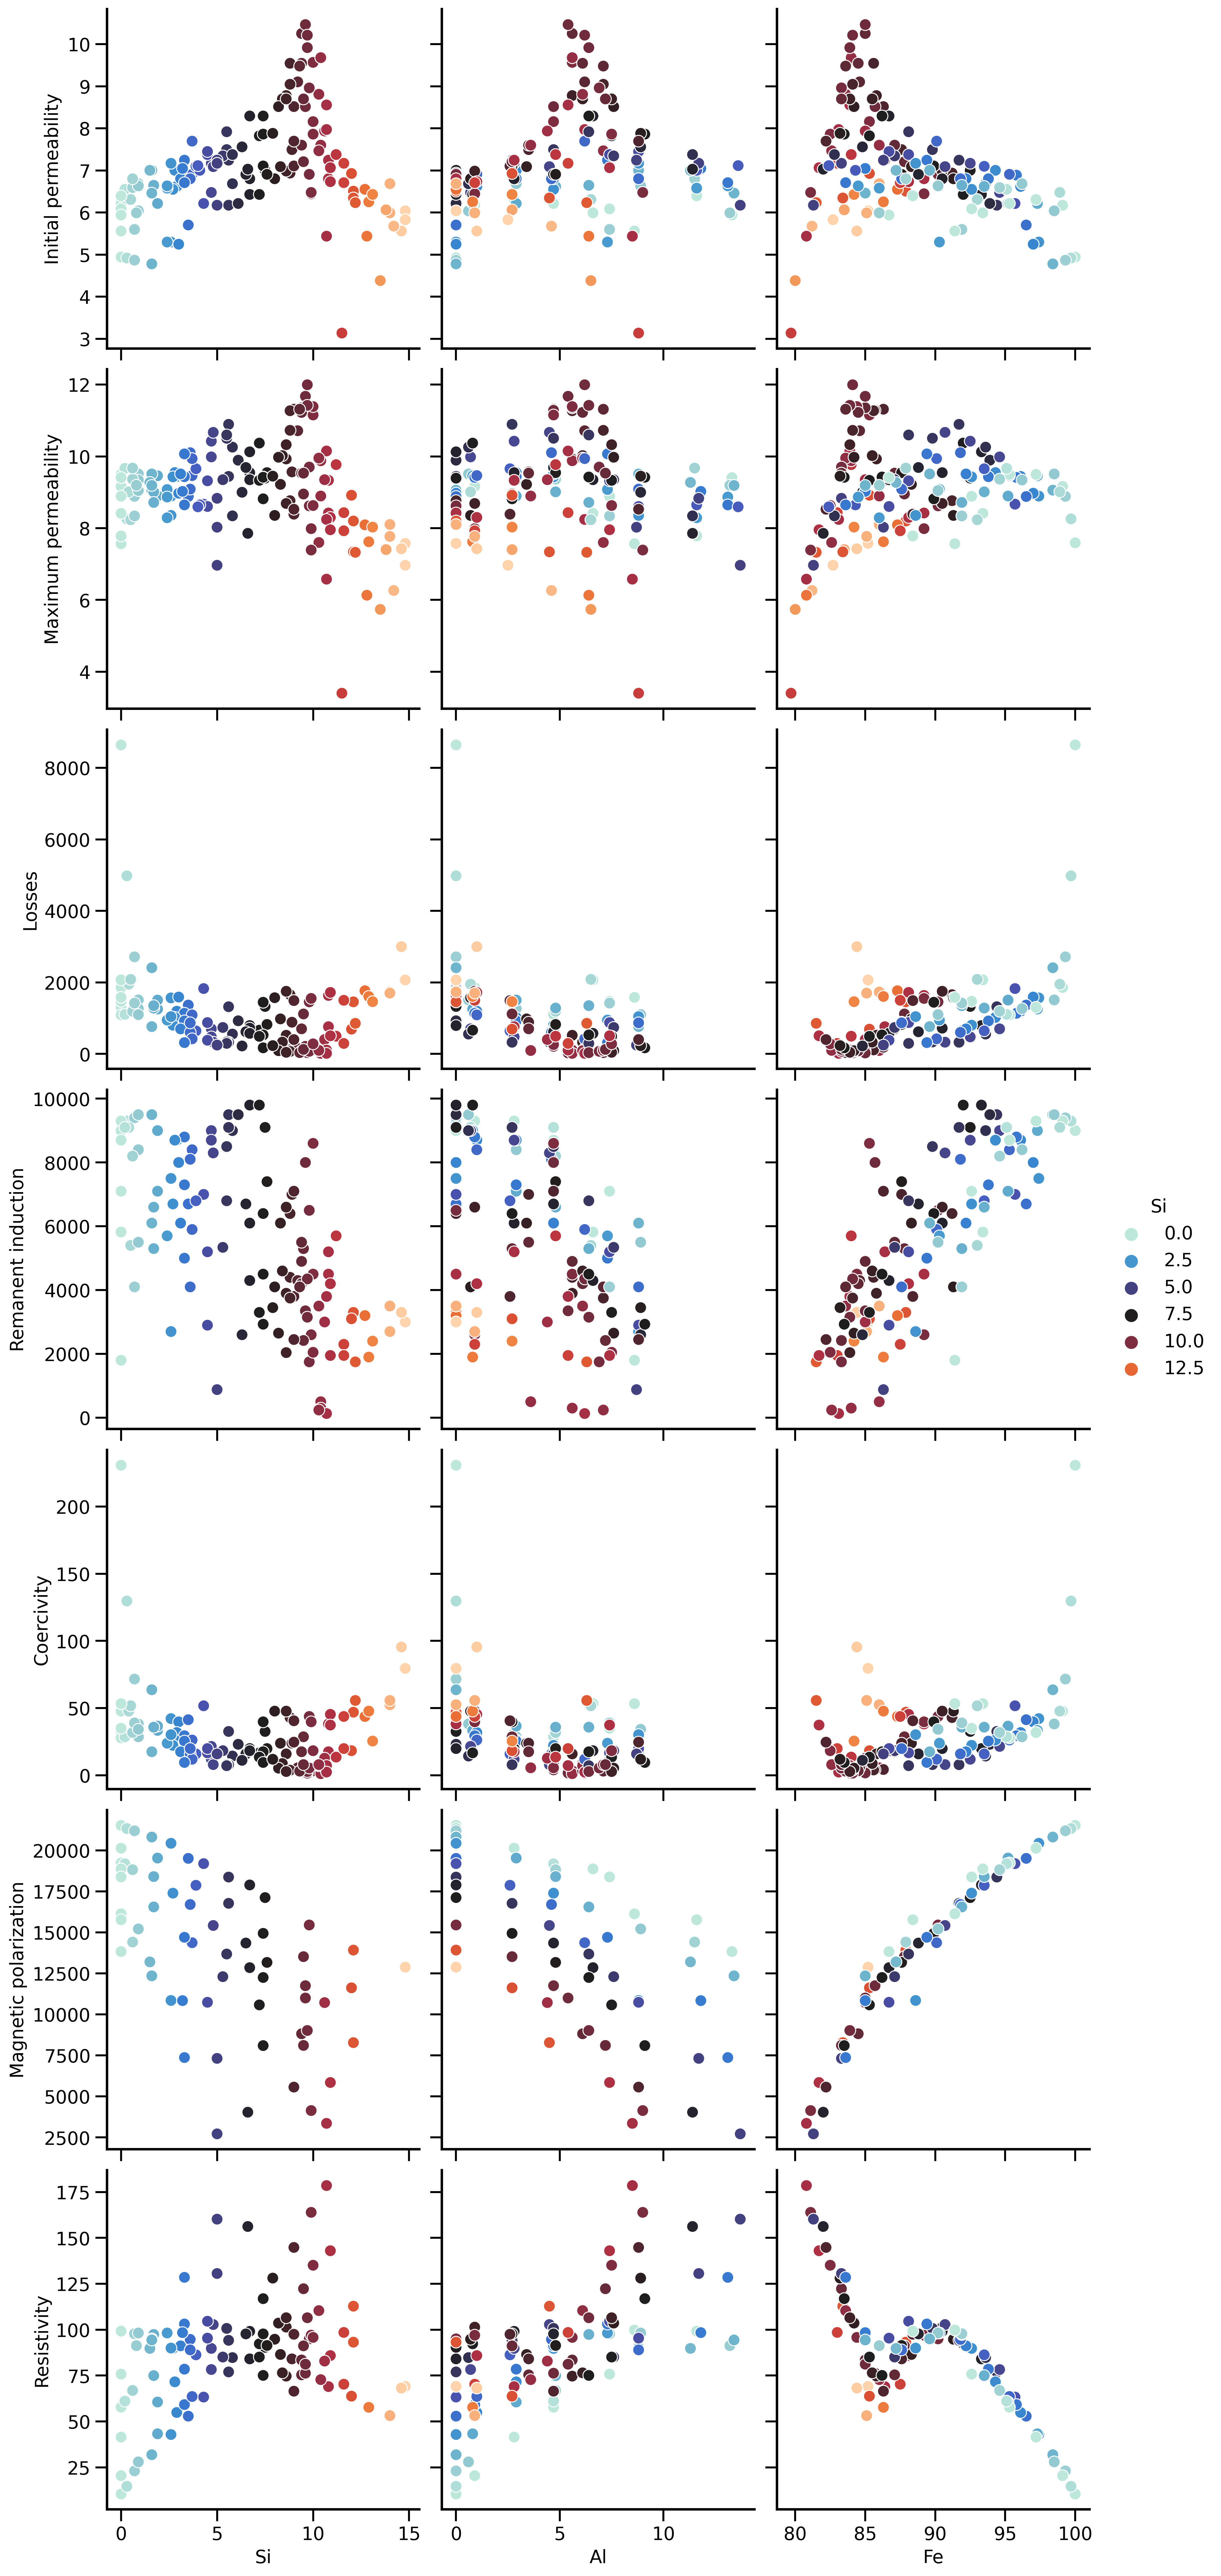

In [17]:
sns.pairplot(sendust, x_vars=features, y_vars=targets, dropna=True, hue='Si',height=4, aspect=1, palette='icefire')

In [18]:
high_corr_targets = list(sendust.iloc[:, lambda sendust: [6,8,9]])

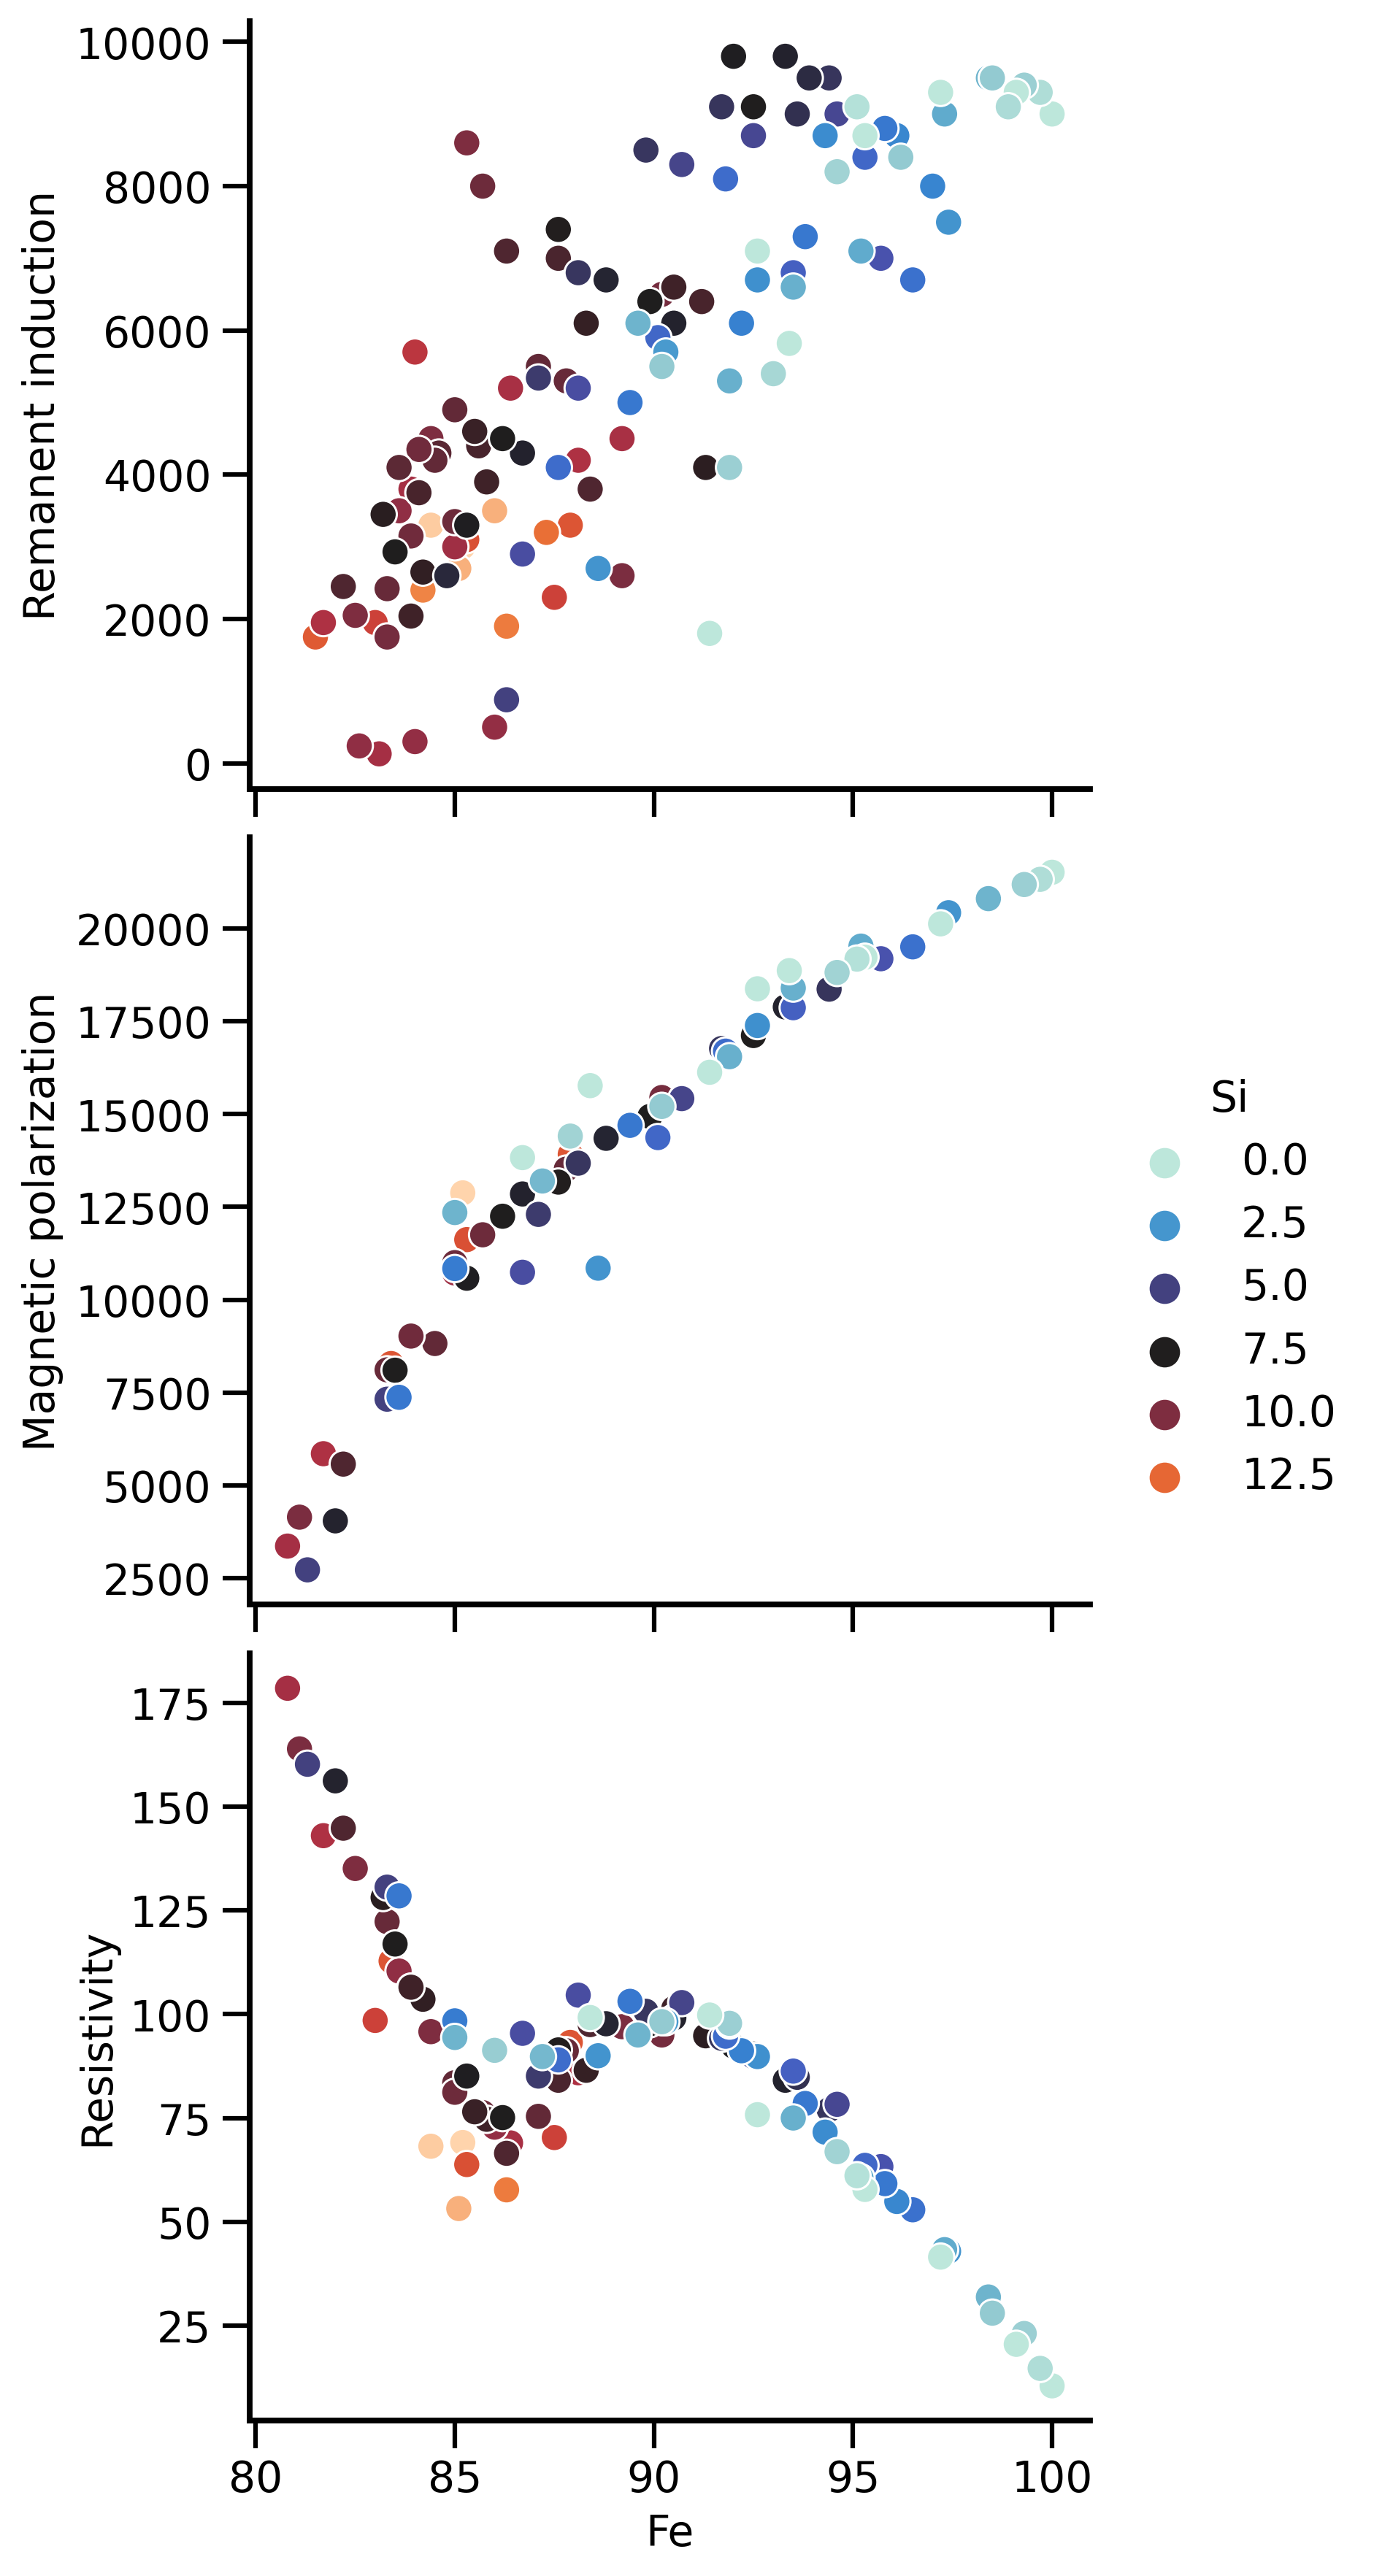

In [19]:
sns.pairplot(sendust, x_vars='Fe', y_vars=high_corr_targets, dropna=True, hue='Si',height=4, aspect=1.3, palette='icefire')

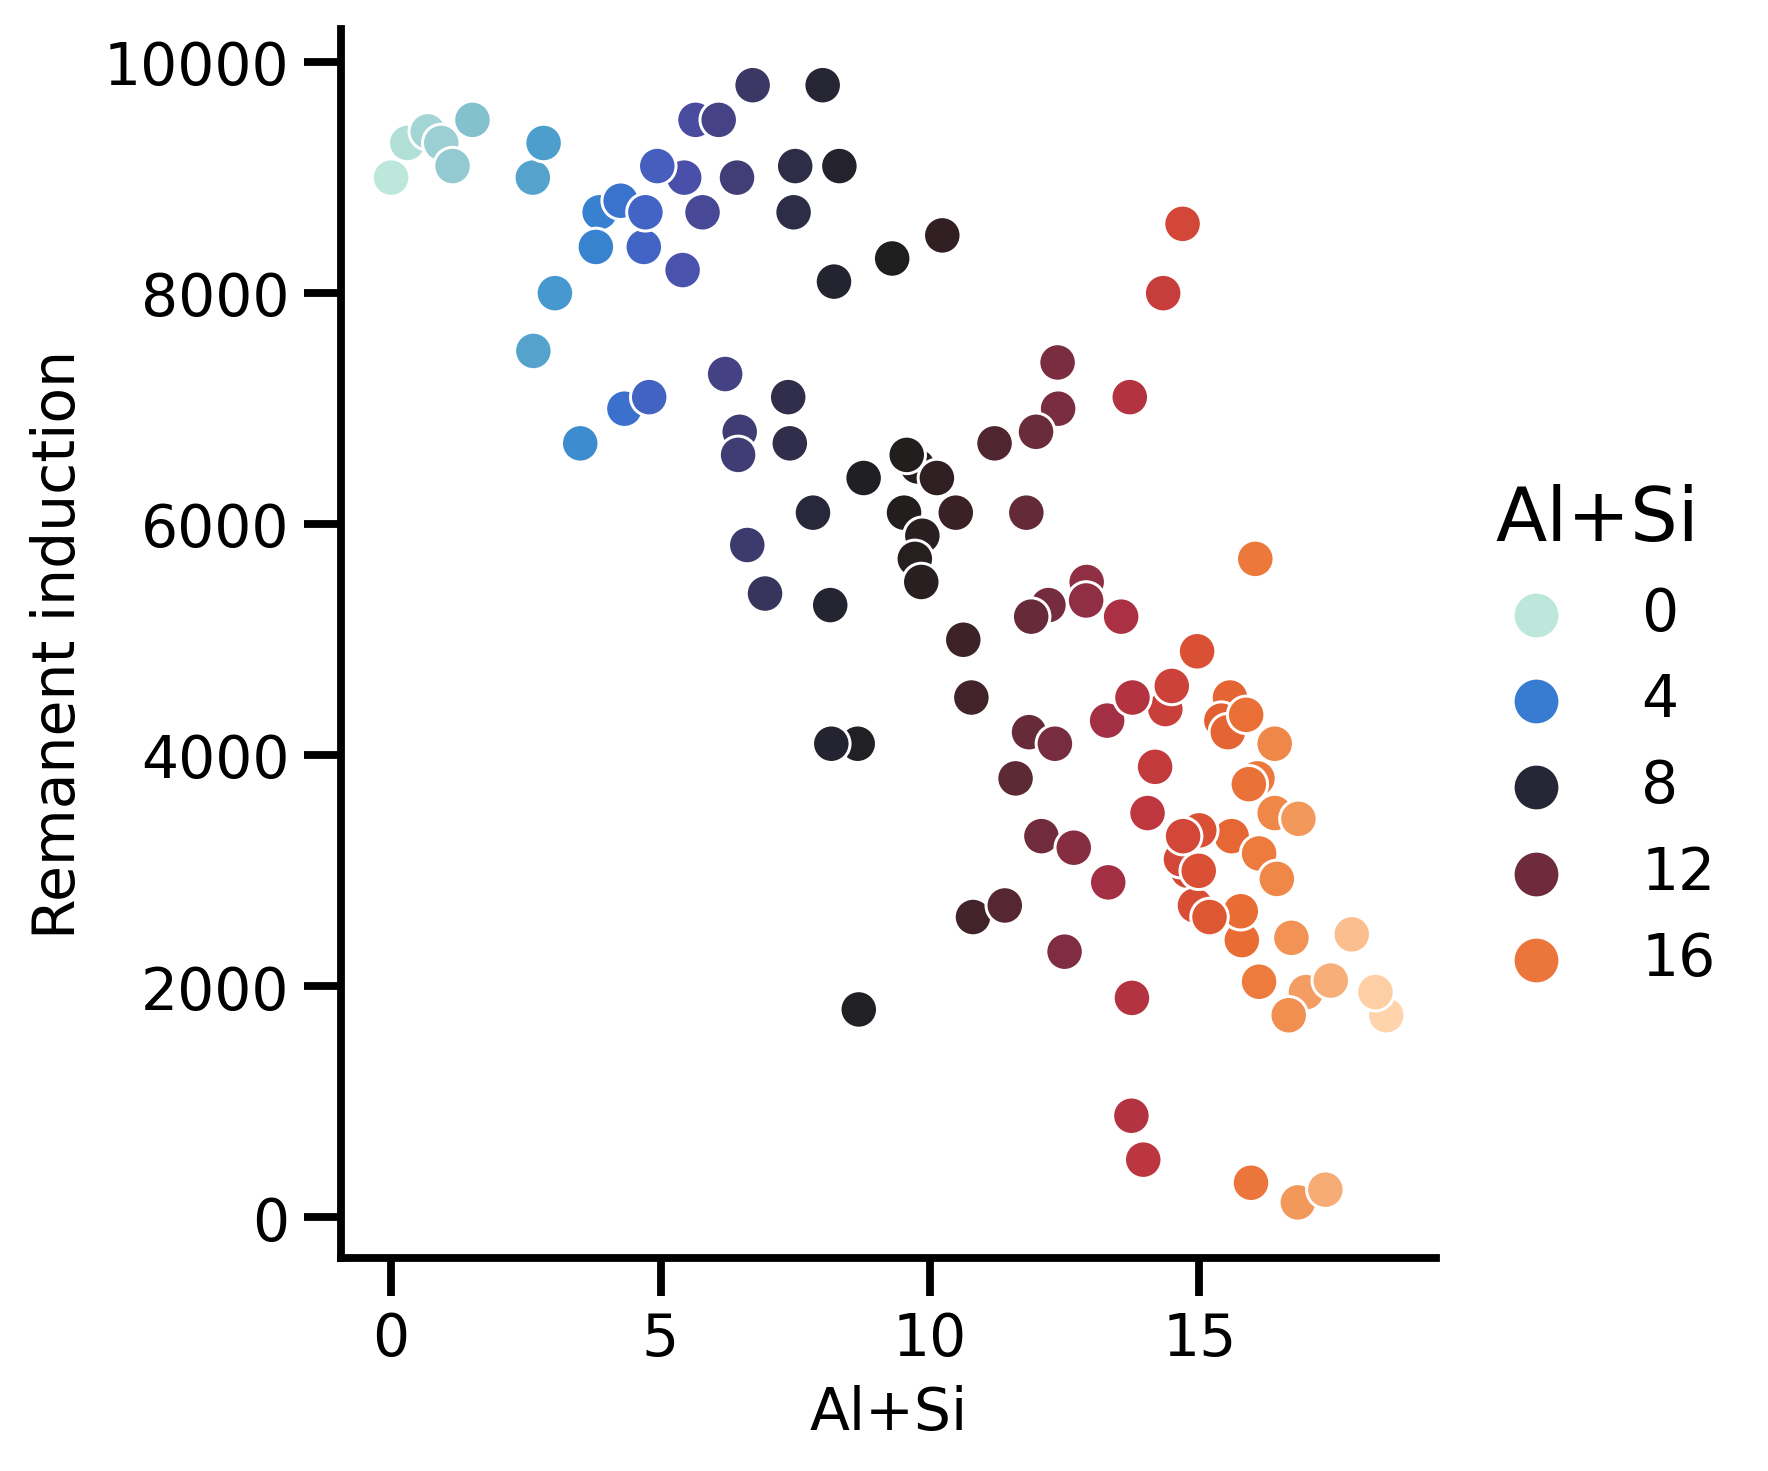

In [ ]:
sns.pairplot(sendust, x_vars='Fe', y_vars='Remanent induction', dropna=True, hue='Fe',height=5, aspect=1, palette='icefire')

# Heatmaps

In [20]:
dataset_correlations = sendust.corr(method='spearman')

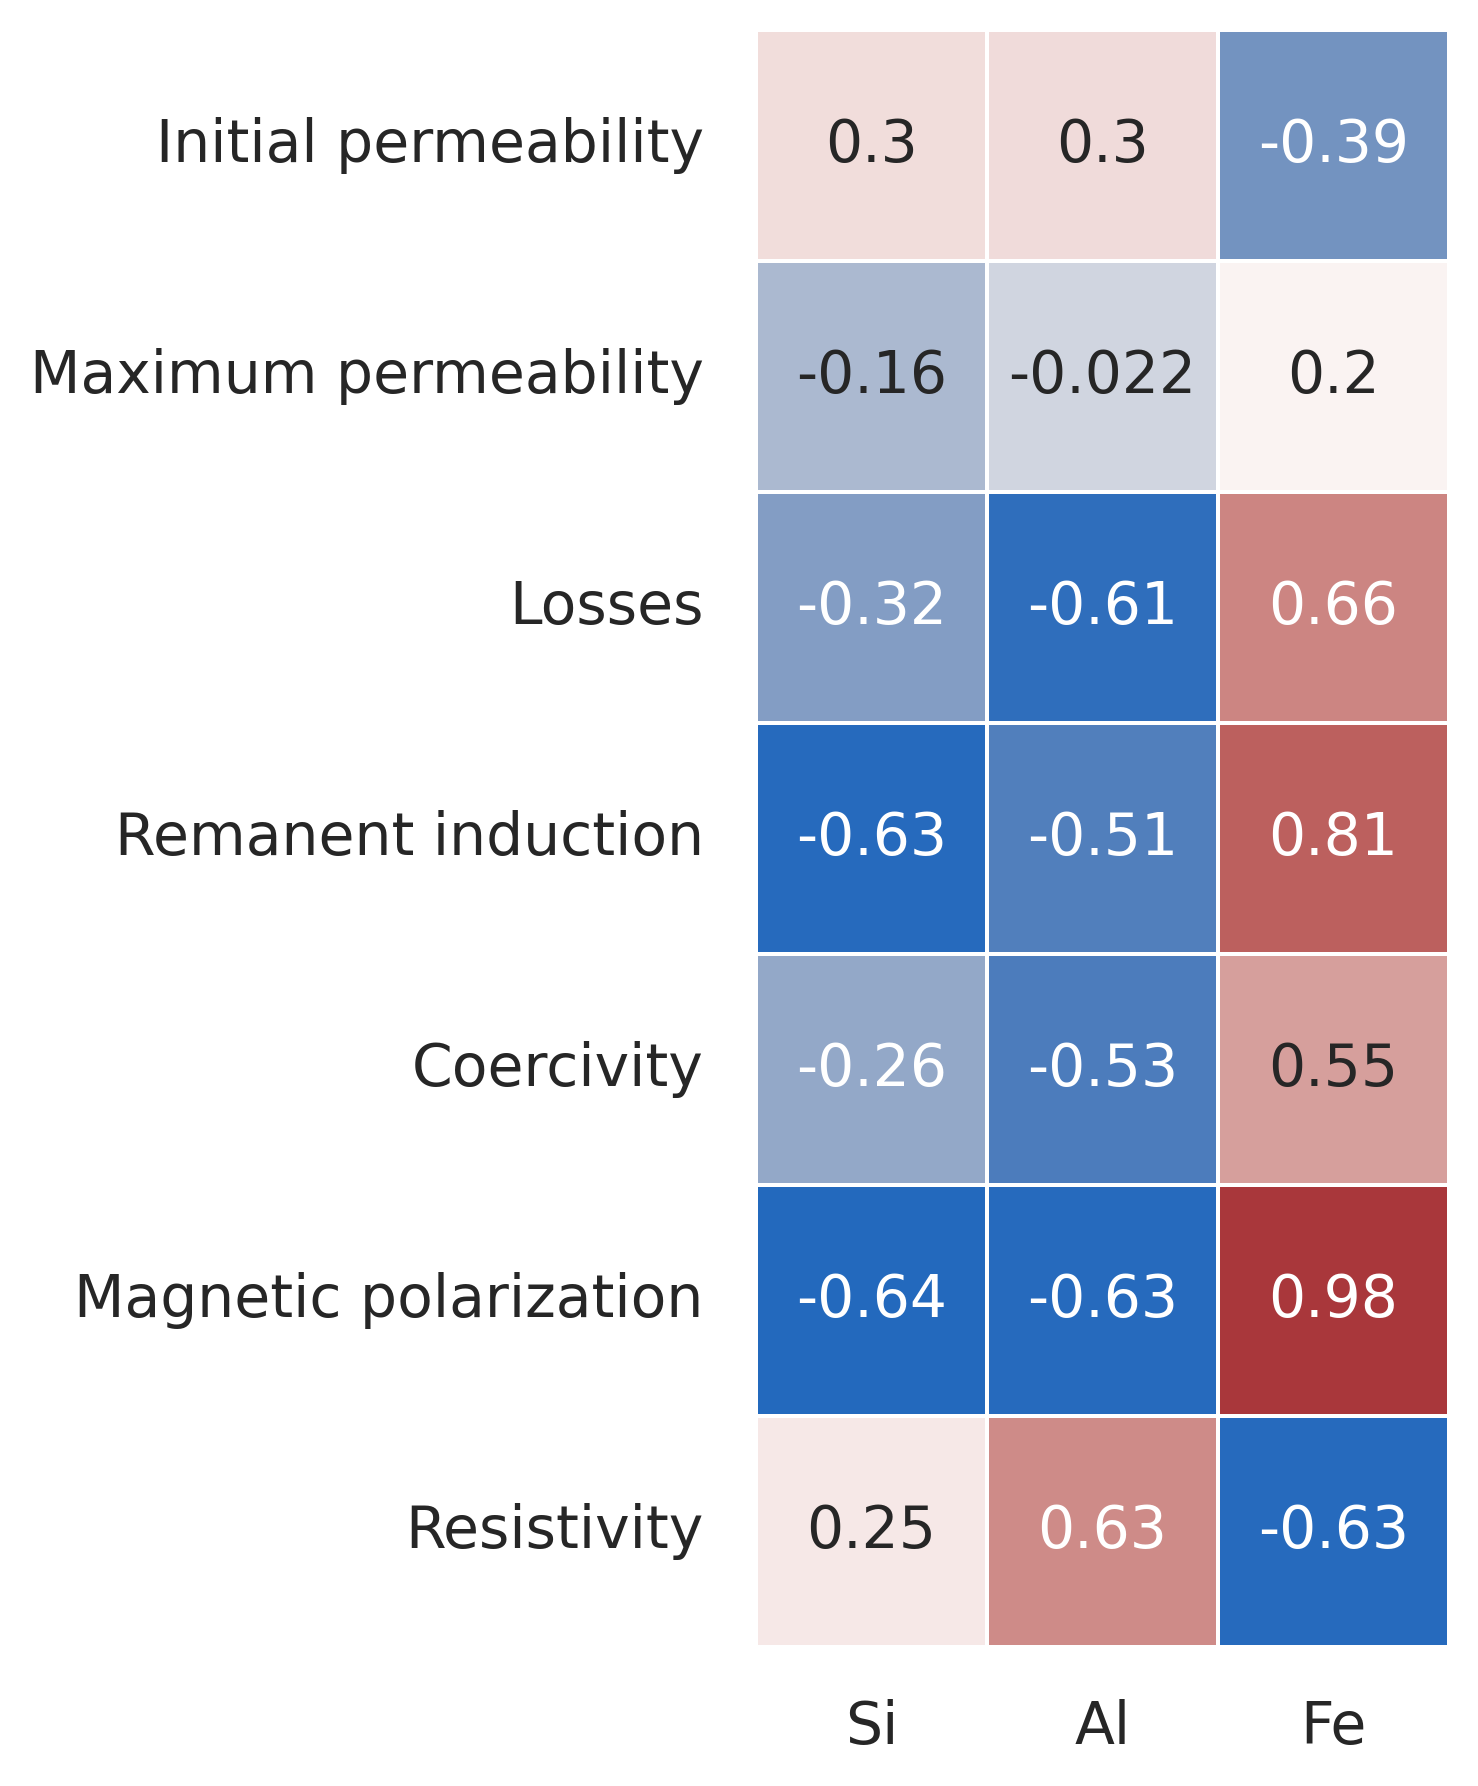

In [21]:
sns.set_style("whitegrid")
feature_correlations = dataset_correlations[3:10][features]
f_cor, ax_cor = plt.subplots(figsize=(7,7))
corr_heatmap = sns.heatmap(feature_correlations, cmap = "vlag", linewidths=0.5, square = True, annot=True, cbar=False)

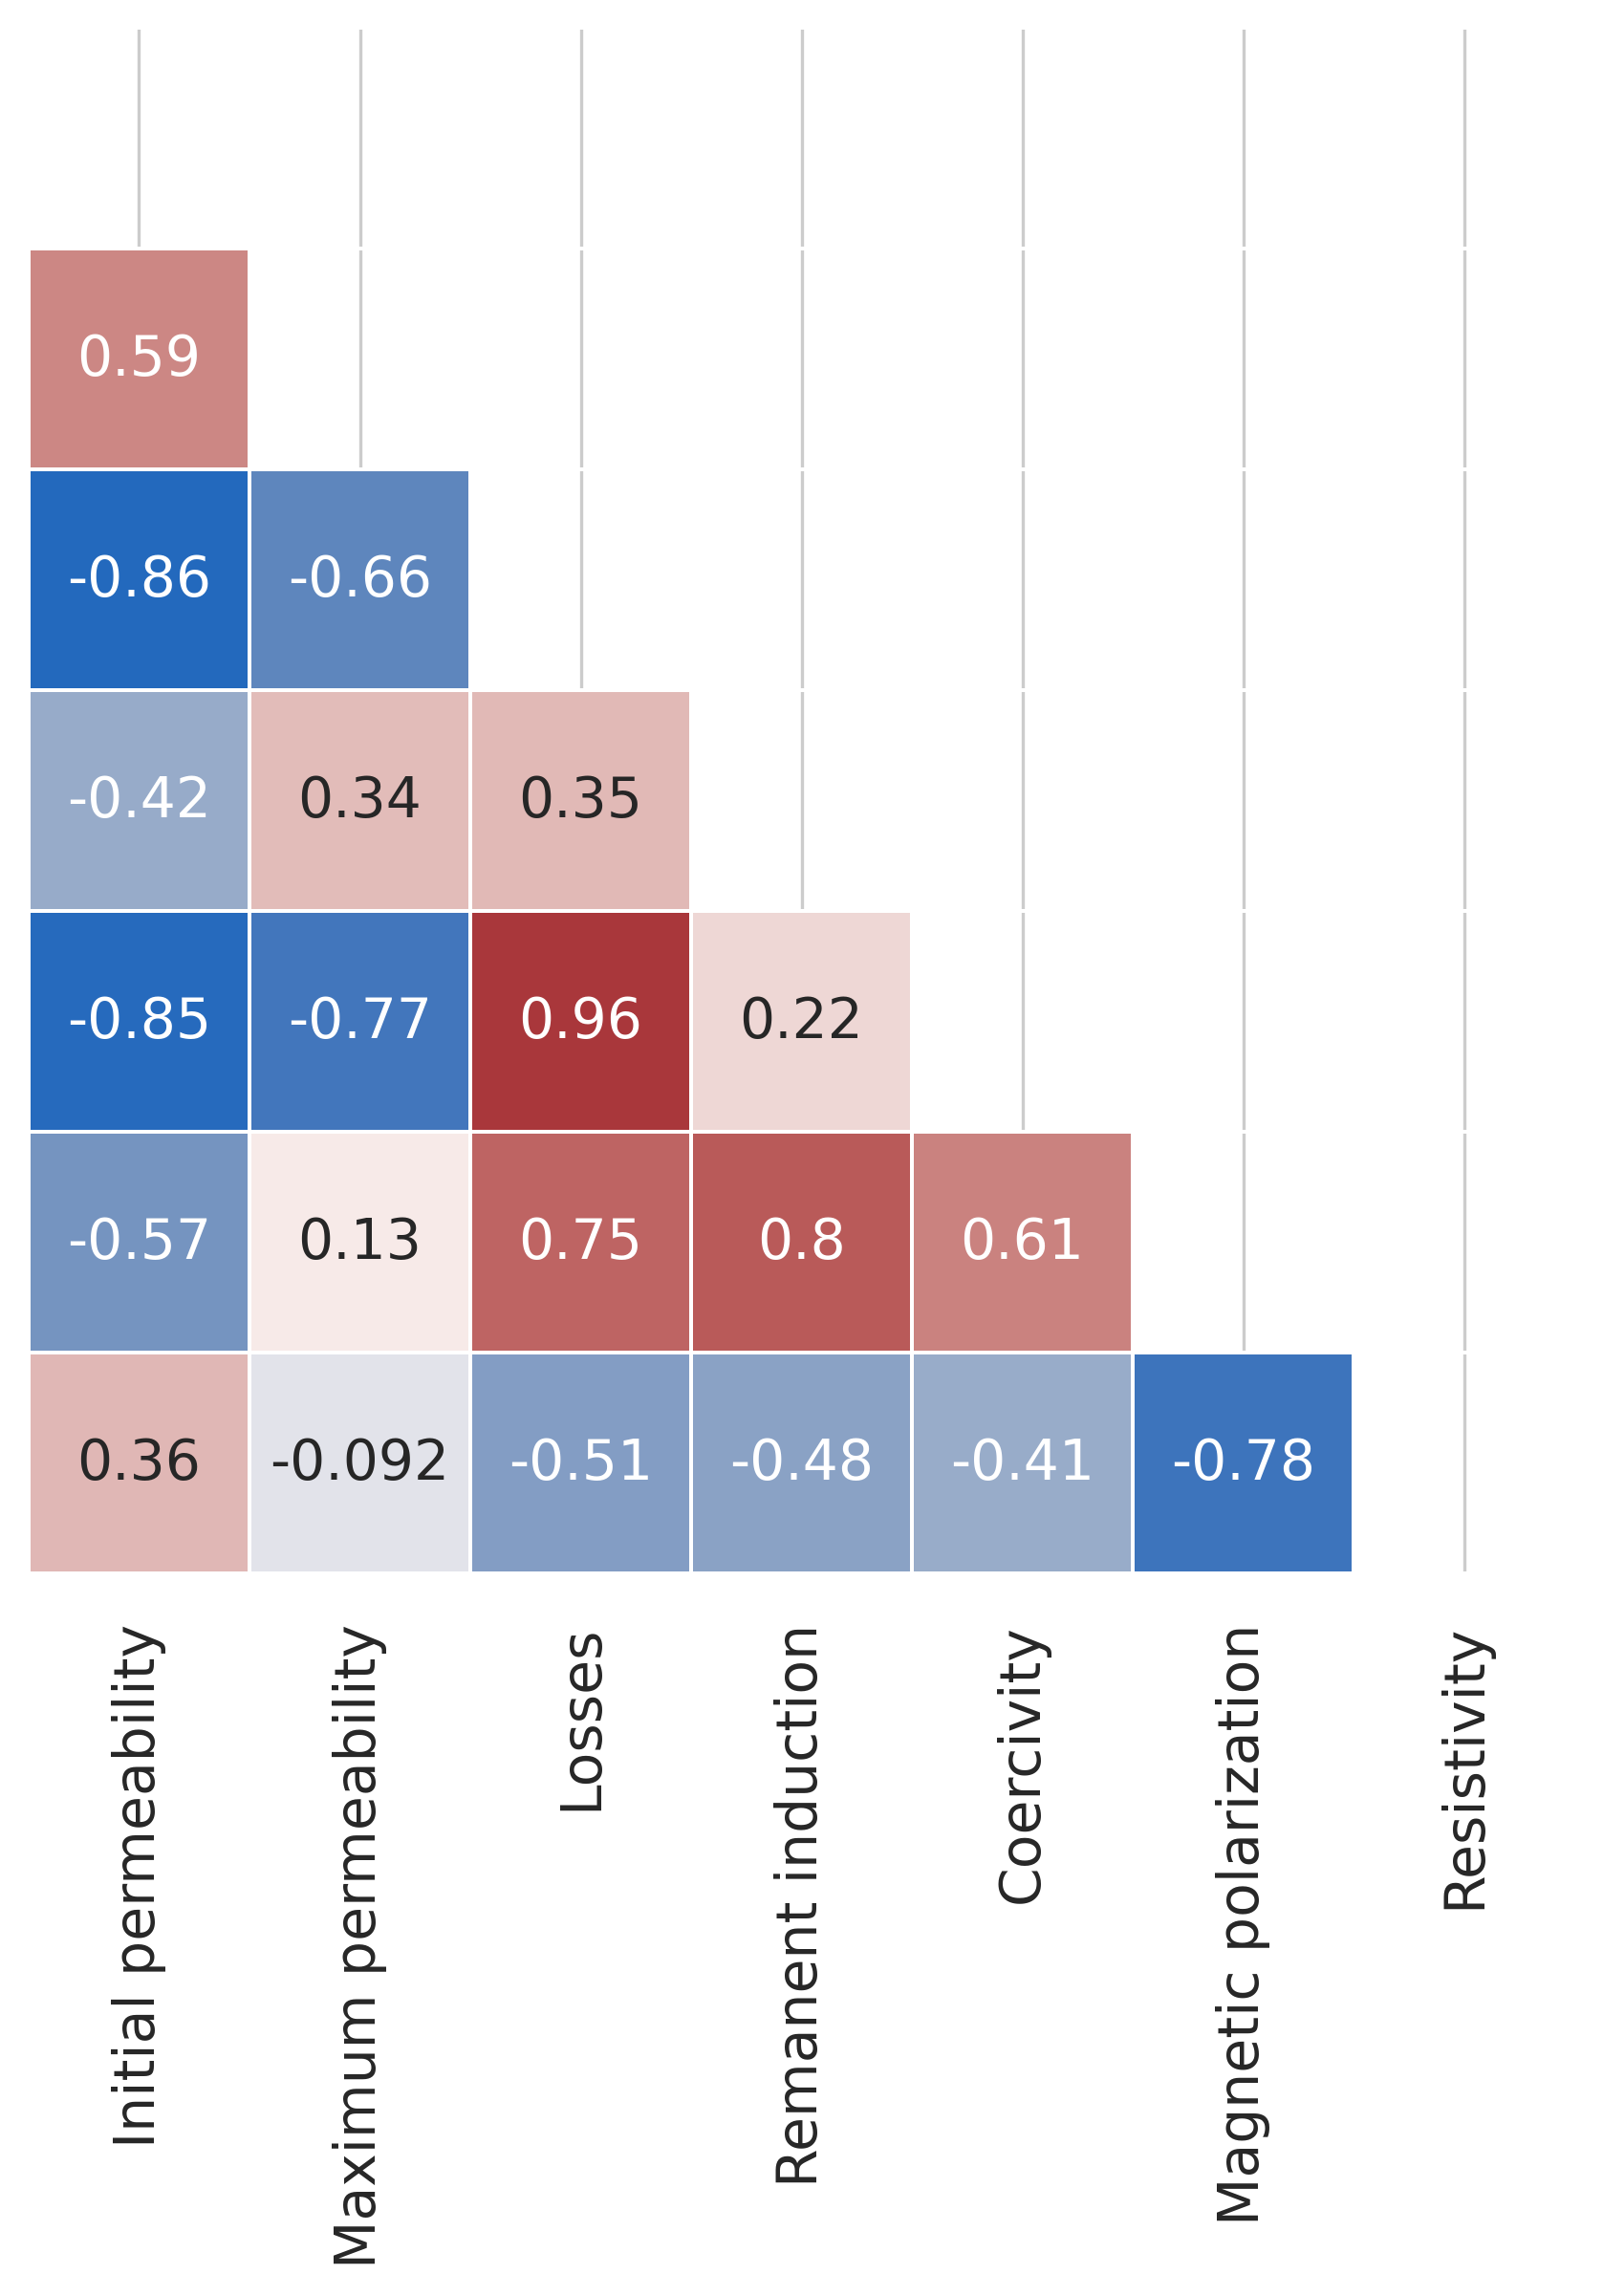

In [25]:
target_correlations = dataset_correlations[3:10][targets]
mask = np.zeros_like(target_correlations)
mask[np.triu_indices_from(mask)] = True
f_cor, ax_cor = plt.subplots(figsize=(7,7))
corr_heatmap = sns.heatmap(target_correlations, xticklabels=target_correlations[0:7], yticklabels = False, cmap="vlag", mask=mask, linewidths=0.5, square = True, annot=True, cbar=False)

# Visualisation of the strongest correlations between properties

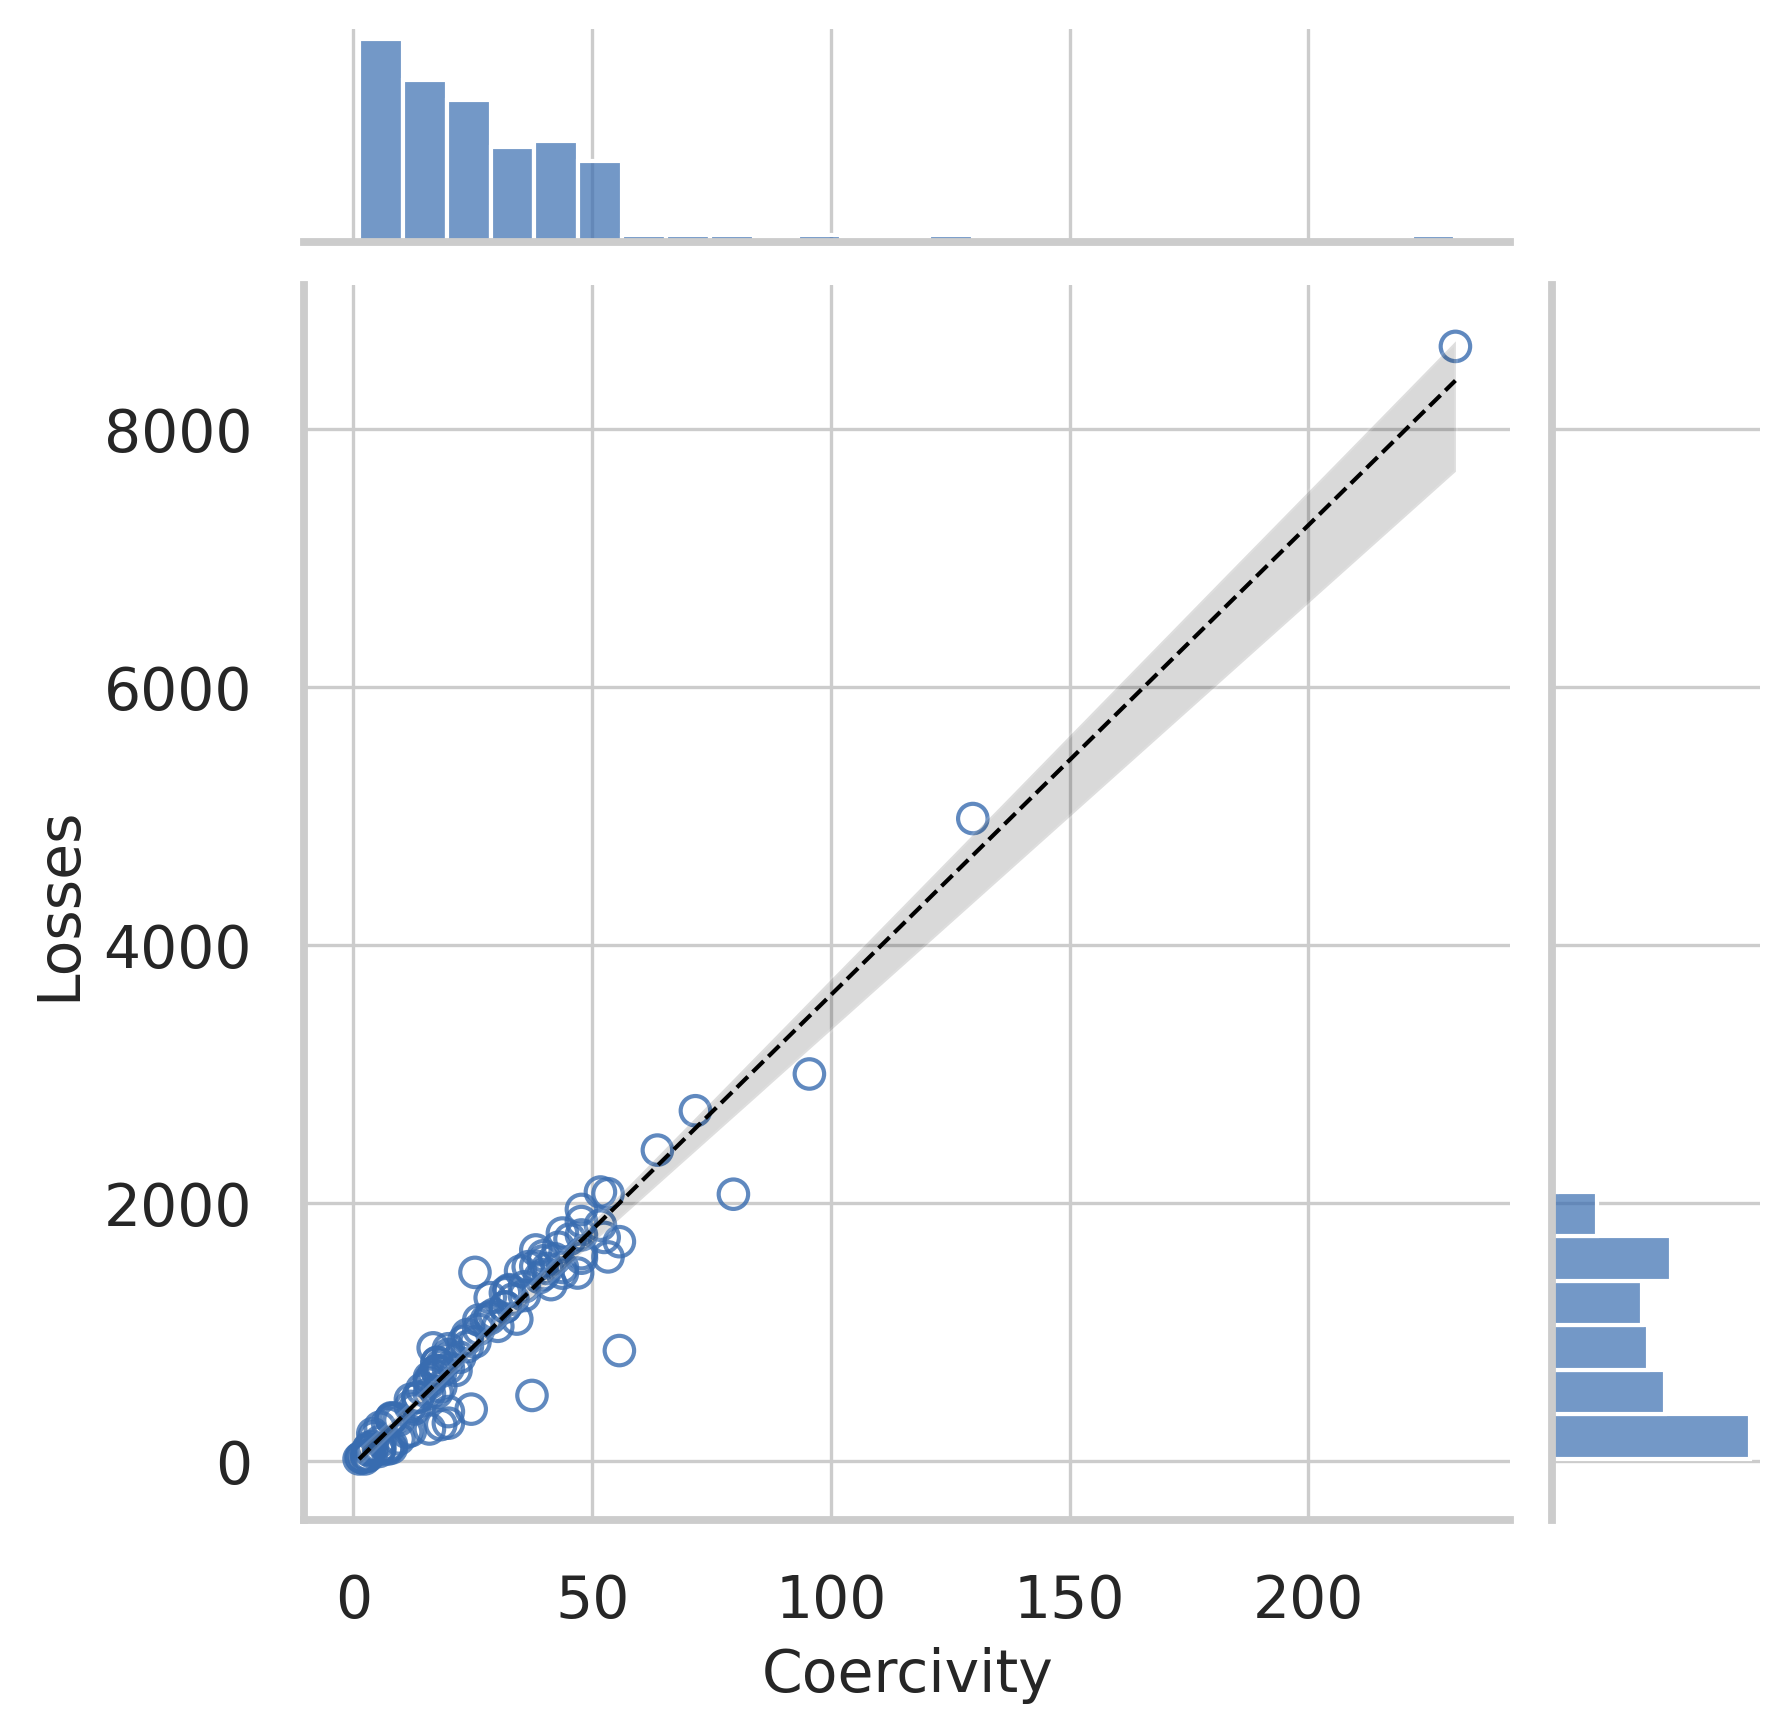

In [26]:
sns.set_style()
sns.jointplot(data=sendust, x='Coercivity', y='Losses', dropna=True, marker="o", color='#386cb0', kind='reg', marginal_kws=dict(bins=25, alpha=0.7, kde=False), line_kws={'linewidth': 1, 'color': 'k', 'linestyle' : '--'}, scatter_kws={'s':50, 'facecolors':'none'})

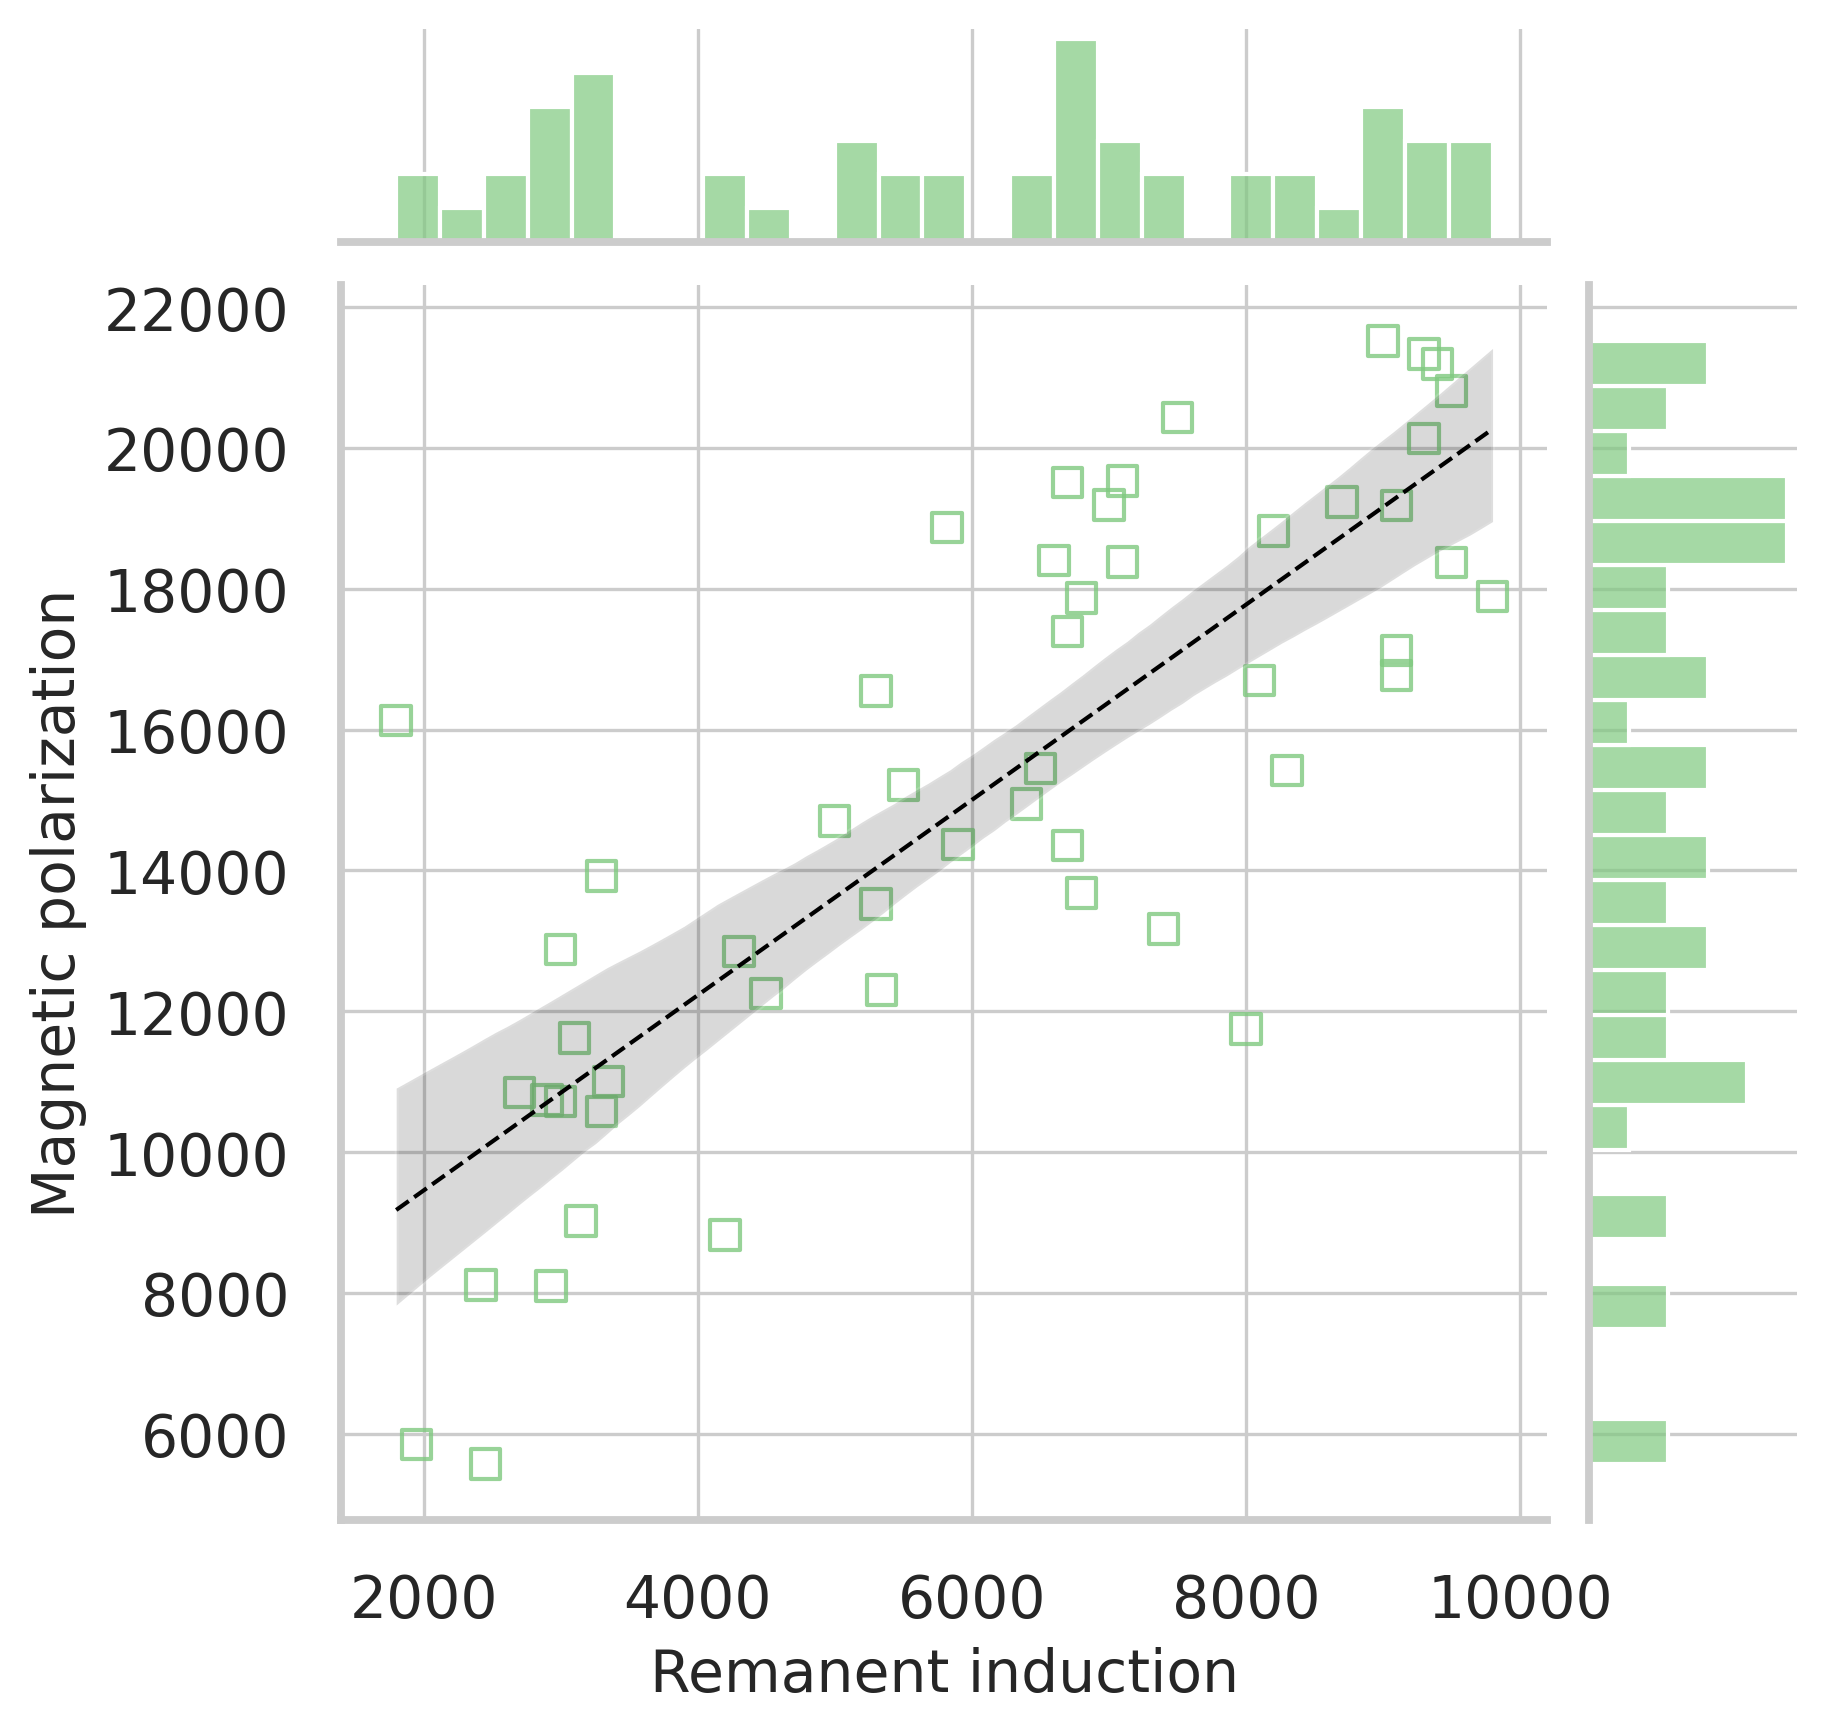

In [27]:

sns.jointplot(data=sendust, x='Remanent induction', y='Magnetic polarization', dropna=True, marker="s", color='#7fc97f', kind='reg', marginal_kws=dict(bins=25, alpha=0.7, kde=False), line_kws={'linewidth': 1, 'color': 'k', 'linestyle' : '--'}, scatter_kws={'s':50, 'facecolors':'none'})

# Creation individual datasets for  different targets

In [42]:
sendust

Si    Al     Fe   Log(initial permeability)  Log(max permeability)  \
0    0.0   0.0  100.0                    4.941642               7.590852   
1    0.3   0.0   99.7                    4.919981               8.258422   
2    0.7   0.0   99.3                    4.867534               8.885994   
3    1.6   0.0   98.4                    4.779123               9.058354   
4    2.6   0.0   97.4                    5.298317               8.892886   
..   ...   ...    ...                         ...                    ...   
142  1.6  13.4   85.0                    6.461468               9.190138   
143  2.4  13.1   84.5                    6.633318               8.867850   
144  3.3  13.1   83.6                    6.709304               8.648221   
145  4.0  13.6   82.4                    7.114769               8.594154   
146  5.0  13.7   81.3                    6.173786               6.966024   

     Losses  Remanent induction  Coercivity  Magnetic polarization  \
0    8640.0              9000.0      230.77                21520.0   
1    4980.0              9300.0      129.71                21330.0   
2    2715.0              9400.0       71.62                21190.0   
3    2410.0              9500.0       63.66                20810.0   
4    1567.0              7500.0       42.18                20430.0   
..      ...                 ...         ...                    ...   
142     NaN                 NaN         NaN                12350.0   
143     NaN                 NaN         NaN                    NaN   
144     NaN                 NaN         NaN                 7370.0   
145     NaN                 NaN         NaN                    NaN   
146     NaN                 NaN         NaN                 2720.0   

     Resistivity  
0           10.5  
1           14.7  
2           23.1  
3           31.9  
4           42.9  
..           ...  
142         94.4  
143          NaN  
144        128.5  
145          NaN  
146        160.2  

[147 rows x 10 columns]

In [14]:
Coercivity = sendust[['Si', 'Al', 'Fe', 'Coercivity']]
Coercivity = Coercivity.dropna(axis=0, how='any')
IP = sendust[['Si', 'Al', 'Fe', 'Log(initial permeability)']]
#Remove of NaN values is not necessary here because all compositions have the initial permeability data
MP = sendust[['Si', 'Al', 'Fe', 'Log(max permeability)']]
#Remove of NaN values is not necessary here because all compositions have the Max permeability data
RI = sendust[['Si', 'Al', 'Fe', 'Remanent induction']]
RI = RI.dropna(axis=0, how='any')
Polarization = sendust[['Si', 'Al', 'Fe', 'Magnetic polarization']]
Polarization = P.dropna(axis=0, how='any')
Resistivity = sendust[['Si', 'Al', 'Fe', 'Resistivity']]
Resistivity = Resistivity.dropna(axis=0, how='any')

In [15]:
#datasets download
Coercivity.to_csv('Coercivity.csv')
IP.to_csv('IP.csv')
MP.to_csv('MP.csv')
RI.to_csv('RI.csv')
Polarization.to_csv('Polarization.csv')
Resistivity.to_csv('Resistivity.csv')
files.download('Coercivity.csv')
files.download('IP.csv')
files.download('MP.csv')
files.download('RI.csv')
files.download('Polarization.csv')
files.download('Resistivity.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data splitting

In [ ]:
Coercivity_train, Coercivity_test = train_test_split(Coercivity, test_size=0.15, random_state=42)
IP_train, IP_test = train_test_split(IP, test_size=0.15, random_state=42)
MP_train, MP_test = train_test_split(MP, test_size=0.15, random_state=42)
RI_train, RI_test = train_test_split(RI, test_size=0.15, random_state=42)
P_train, P_test = train_test_split(P, test_size=0.15, random_state=42)
Resistivity_train, Resistivity_test = train_test_split(Resistivity, test_size=0.15, random_state=42)

# Created dataset saving

In [ ]:
Coercivity_train.to_csv('Coercivity_train.csv')
Coercivity_test.to_csv('Coercivity_test.csv')
files.download('Coercivity_train.csv')
files.download('Coercivity_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
IP_train.to_csv('IP_train.csv')
IP_test.to_csv('IP_test.csv')
files.download('IP_train.csv')
files.download('IP_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
MP_train.to_csv('MP_train.csv')
MP_test.to_csv('MP_test.csv')
files.download('MP_train.csv')
files.download('MP_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
RI_train.to_csv('RI_train.csv')
RI_test.to_csv('RI_test.csv')
files.download('RI_train.csv')
files.download('RI_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
P_train.to_csv('P_train.csv')
P_test.to_csv('P_test.csv')
files.download('P_train.csv')
files.download('P_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Resistivity_train.to_csv('Resistivity_train.csv')
Resistivity_test.to_csv('Resistivity_test.csv')
files.download('Resistivity_train.csv')
files.download('Resistivity_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>